In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns

In [2]:
df = pd.read_csv('sample_labels.csv')

In [3]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139000,0.139000
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168000,0.168000
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,No Finding,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311
5602,00030786_005.png,Cardiomegaly|Effusion|Emphysema,5,30786,061Y,F,AP,3056,2544,0.139000,0.139000
5603,00030789_000.png,Infiltration,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311
5604,00030792_000.png,No Finding,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311


In [4]:
pd.unique(df['View Position'])

array(['AP', 'PA'], dtype=object)

In [5]:
df['Finding Labels']

0       Emphysema|Infiltration|Pleural_Thickening|Pneu...
1                                  Cardiomegaly|Emphysema
2                                              No Finding
3                                             Atelectasis
4                             Cardiomegaly|Edema|Effusion
                              ...                        
5601                                           No Finding
5602                      Cardiomegaly|Effusion|Emphysema
5603                                         Infiltration
5604                                           No Finding
5605                                           No Finding
Name: Finding Labels, Length: 5606, dtype: object

In [6]:
categories = ["hernia", "pneumonia", "fibrosis", "edema", "emphysema", "cardiomegaly", "pleural_thickening", 
              "consolidation", "pneumothorax", "mass", "nodule", "atelectasis", "effusion", "infiltration", 
              "no finding"]

In [7]:
def process_row(row):
    wide_dict['image_id'].append(row['Image Index'])
    wide_dict['age'].append(int(row['Patient Age'][:-1]))
    category_lower = row['Finding Labels'].lower()
    for category in categories:
        if category in category_lower:
            wide_dict[category].append(1)
        else:
            wide_dict[category].append(0)

In [8]:
wide_dict = {'image_id': [], 'age':[]}
for category in categories:
    wide_dict[category] = []

df.apply(process_row, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
5601    None
5602    None
5603    None
5604    None
5605    None
Length: 5606, dtype: object

In [9]:
wide_df = pd.DataFrame(wide_dict)

In [10]:
wide_df

,image_id,age,hernia,pneumonia,fibrosis,edema,emphysema,cardiomegaly,pleural_thickening,consolidation,pneumothorax,mass,nodule,atelectasis,effusion,infiltration,no finding
0,00000013_005.png,60,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
1,00000013_026.png,57,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,00000017_001.png,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,00000030_001.png,79,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,00000032_001.png,55,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5602,00030786_005.png,61,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
5603,00030789_000.png,52,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5604,00030792_000.png,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

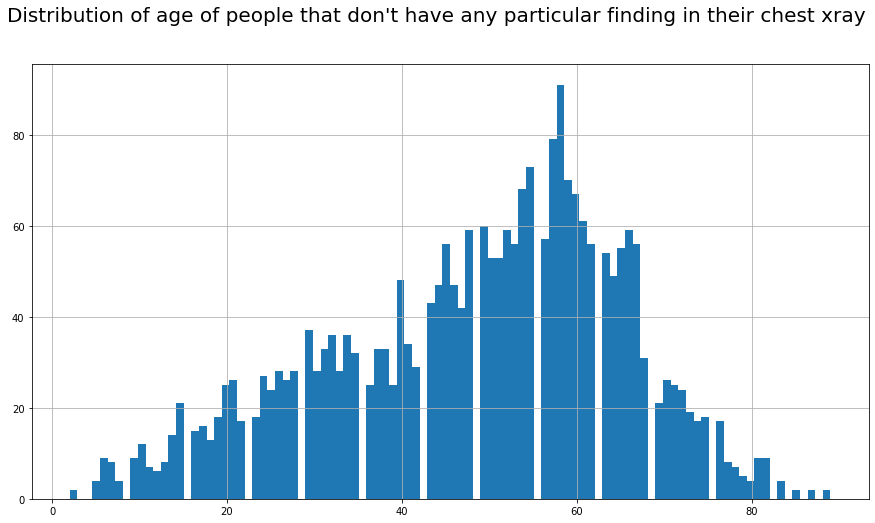

In [11]:
fig = plt.figure(figsize = (15,8))
fig.suptitle("Distribution of age of people that don't have any particular finding in their chest xray", fontsize=20)
wide_df[wide_df['no finding'] == 0]['age'].hist(bins=100)

<AxesSubplot:>

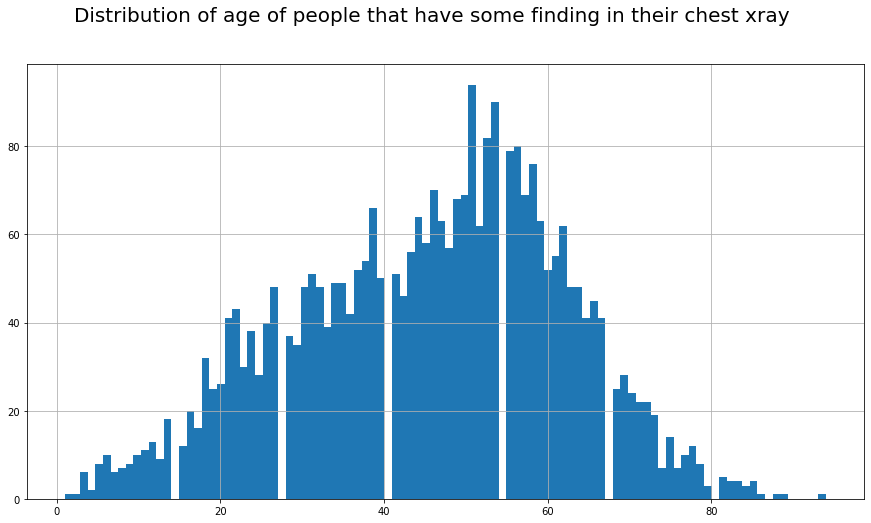

In [12]:
fig = plt.figure(figsize = (15, 8))
fig.suptitle("Distribution of age of people that have some finding in their chest xray", fontsize=20)
wide_df[(wide_df['no finding'] == 1) & (wide_df['age'] <= 100)]['age'].hist(bins=100)

### Analyzing Collinearity and Multi - Collinearity

In [13]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

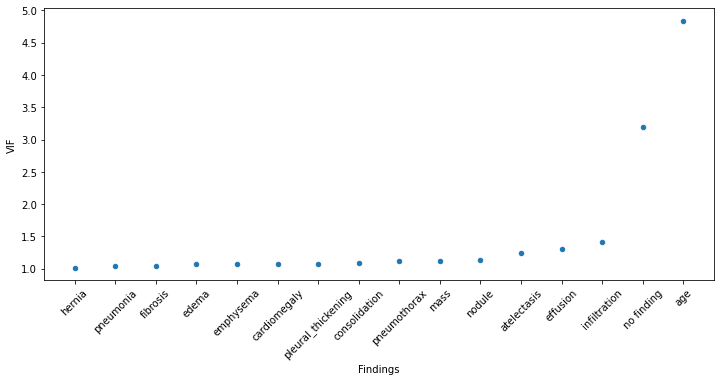

In [27]:
calc_vif(wide_df[categories + ['age']]).plot(kind='scatter', x='variables', y='VIF', figsize=(12, 5))
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Findings')
plt.show()

Seems to be a high VIF for the `Age` feature with the rest of Findings.

Let us try to isolate the affect that age is correlated with the rest of the features

In [72]:
vif_dict = {}
for i in range(0, len(categories)-1):
    vif_df = calc_vif(wide_df[categories[i:i+1] + categories[-1:] + ['age']])
    vif_dict[categories[i]] = (vif_df[vif_df['variables'] == 'no finding']['VIF'].values[0], vif_df[vif_df['variables'] == 'age']['VIF'].values[0])

In [97]:
vif_final = pd.DataFrame(vif_dict).T.rename(columns={0: 'no finding', 1: 'age'}).reset_index()
# vif_final.plot(kind = 'scatter', x='no finding', y='age', legend='index')

In [98]:
vif_final

,index,no finding,age
0,hernia,1.829690,1.836068
1,pneumonia,1.836895,1.852011
2,fibrosis,1.851546,1.884432
3,edema,1.849903,1.880797
4,emphysema,1.862654,1.909015
5,cardiomegaly,1.860266,1.903730
6,pleural_thickening,1.875716,1.937921
7,consolidation,1.883738,1.955672
8,pneumothorax,1.891472,1.972787
9,mass,1.904866,2.002429


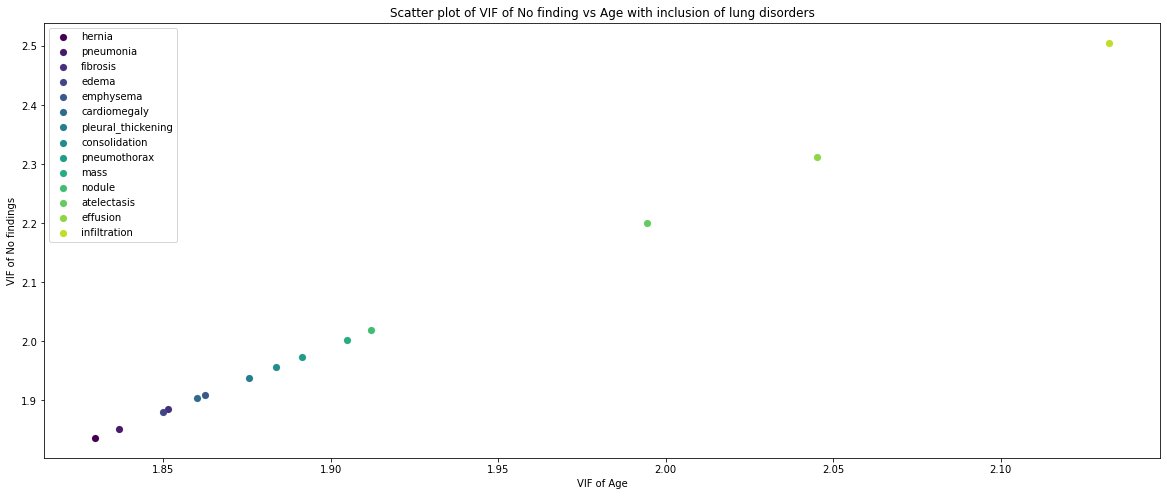

In [116]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)

colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(vif_final['index']))]

for i,c in enumerate(colorlist):

    x = vif_final['no finding'][i]
    y = vif_final['age'][i]
    l = vif_final['index'][i]

    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c)

ax.legend(loc='best')

ax.set_title('Scatter plot of VIF of No finding vs Age with inclusion of lung disorders')
ax.set_xlabel('VIF of Age')
ax.set_ylabel('VIF of No findings')

plt.show()

### Correlation Analysis

In [34]:
corr = wide_df.corr()

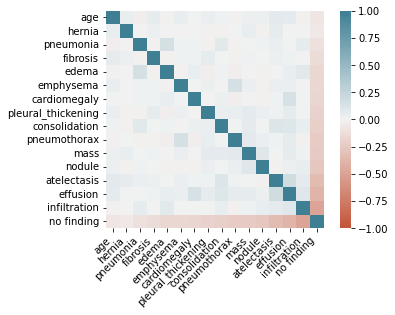

In [36]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);